In [1]:
!pip install -q sentence-transformers datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 20.1 MB/s eta 0:00:00


In [5]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-mpnet-base-v2')

In [7]:
sentences = [
    "it caught him off guard that space smelled of seared steak",
    "she could not decide between painting her teeth or brushing her nails",
    "he thought there'd be sufficient time is he hid his watch",
    "the bees decided to have a mutiny against their queen",
    "the sign said there was road work ahead so she decided to speed up",
    "on a scale of one to ten, what's your favorite flavor of color?",
    "flying stinging insects rebelled in opposition to the matriarch"
]

In [8]:
embs = model.encode(sentences)
embs.shape

(7, 768)

In [33]:
from sentence_transformers import util
import torch
for i, emb in enumerate(embs):
  score = util.pytorch_cos_sim(emb, embs)[0]
  top_k = score.sort(descending=True)[1][1:][0].item()
  print('query:', sentences[i])
  print('match:', sentences[top_k])
  print('\n')

query: it caught him off guard that space smelled of seared steak
match: he thought there'd be sufficient time is he hid his watch


query: she could not decide between painting her teeth or brushing her nails
match: the sign said there was road work ahead so she decided to speed up


query: he thought there'd be sufficient time is he hid his watch
match: the sign said there was road work ahead so she decided to speed up


query: the bees decided to have a mutiny against their queen
match: flying stinging insects rebelled in opposition to the matriarch


query: the sign said there was road work ahead so she decided to speed up
match: he thought there'd be sufficient time is he hid his watch


query: on a scale of one to ten, what's your favorite flavor of color?
match: she could not decide between painting her teeth or brushing her nails


query: flying stinging insects rebelled in opposition to the matriarch
match: the bees decided to have a mutiny against their queen




In [ ]:
from transformers import DPRContextEncoder, DPRContextEncoderTokenizer
from transformers import DPRQuestionEncoder, DPRQuestionEncoderTokenizer

ctx_model = DPRContextEncoder.from_pretrained('facebook/dpr-ctx_encoder-single-nq-base')
ctx_tokenizer = DPRContextEncoderTokenizer.from_pretrained('facebook/dpr-ctx_encoder-single-nq-base')

question_model = DPRQuestionEncoder.from_pretrained('facebook/dpr-question_encoder-single-nq-base')
question_tokenizer = DPRQuestionEncoderTokenizer.from_pretrained('facebook/dpr-question_encoder-single-nq-base')

In [38]:
questions = [
    "what is the capital city of australia?",
    "what is the best selling sci-fi book?",
    "how many searches are performed on Google?"
]

contexts = [
    "canberra is the capital city of australia",
    "what is the capital city of australia?",
    "the capital city of france is paris",
    "what is the best selling sci-fi book?",
    "sc-fi is a popular book genre read by millions",
    "the best-selling sci-fi book is dune",
    "how many searches are performed on Google?",
    "Google serves more than 2 trillion queries annually",
    "Google is a popular search engine"
]

In [50]:
xb_tokens = ctx_tokenizer(contexts, max_length=256, truncation=True, padding='max_length', return_tensors='pt')
xb = ctx_model(**xb_tokens)

In [51]:
xq_tokens = question_tokenizer(questions, max_length=256, truncation=True, padding='max_length', return_tensors='pt')
xq = question_model(**xq_tokens)

In [52]:
xb.pooler_output.shape, xq.pooler_output.shape

(torch.Size([9, 768]), torch.Size([3, 768]))

In [57]:
for i, qvec in enumerate(xq.pooler_output):
  probs = util.pytorch_cos_sim(qvec, xb.pooler_output)
  argmax = torch.argmax(probs)
  print(questions[i])
  print(contexts[argmax])
  print('-------')

what is the capital city of australia?
canberra is the capital city of australia
-------
what is the best selling sci-fi book?
the best-selling sci-fi book is dune
-------
how many searches are performed on Google?
how many searches are performed on Google?
-------


In [61]:
import requests
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from PIL import Image
mpl.rcParams['figure.figsize'] = [5, 4]

In [62]:
urls = [
    "https://images.unsplash.com/photo-1576201836106-db1758fd1c97?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=400&q=80",
    "https://images.unsplash.com/photo-1591294100785-81d39c061468?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=300&q=80",
    "https://images.unsplash.com/photo-1548199973-03cce0bbc87b?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=400&q=80"
]

In [63]:
images = [Image.open(requests.get(url, stream=True).raw) for url in urls]

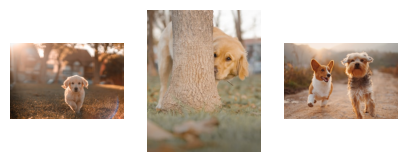

In [68]:
_, axs = plt.subplots(1, len(images))
for img, ax in zip(images, axs):
  ax.imshow(img);
  ax.axis('off')

In [73]:
from transformers import CLIPModel, CLIPProcessor
model = CLIPModel.from_pretrained('openai/clip-vit-base-patch32')
processor = CLIPProcessor.from_pretrained('openai/clip-vit-base-patch32')

In [74]:
captions = ["a dog hiding behind a tree",
            "two dogs running",
            "a dog running",
            "a cucumber on a tree",
            "trees in the park",
            "a cucumber dog"]

In [76]:
inputs = processor(text=captions, images=images, padding=True, return_tensors='pt')
inputs.keys()

dict_keys(['input_ids', 'attention_mask', 'pixel_values'])

In [77]:
inputs['input_ids'].shape, inputs['pixel_values'].shape

(torch.Size([6, 8]), torch.Size([3, 3, 224, 224]))

In [79]:
outputs = model(**inputs)
outputs.keys()

odict_keys(['logits_per_image', 'logits_per_text', 'text_embeds', 'image_embeds', 'text_model_output', 'vision_model_output'])

In [83]:
probs = outputs.logits_per_image.argmax(1)
probs

tensor([2, 0, 1])

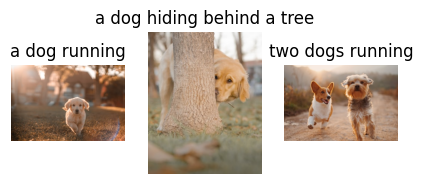

In [85]:
_, axs = plt.subplots(1, len(images))
for img, ax, cap in zip(images, axs, probs):
  ax.imshow(img);
  ax.set_title(captions[cap])
  ax.axis('off')

In [86]:
outputs.text_embeds.shape, outputs.image_embeds.shape

(torch.Size([6, 512]), torch.Size([3, 512]))